In [1]:
import random

def coin_flip():
    coin = 2*(random.randint(2,19) % 2)-1
    return coin

def coin_flipper(n):
    results = []
    a = 0
    while a <= 2 ** n:
        results.append(coin_flip())
        a += 1
    return results


In [2]:
print(coin_flip())

flip65536 = coin_flipper(16)
print(flip65536)

1
[-1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1

In [3]:
def get_interval(n):
    intvl = []
    for x in range(n):
        intvl.append(2**x-1)
    return intvl


In [4]:
get_interval(16)

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767]

In [5]:
def get_results(n):
    interval_results = []
    for x in get_interval(n):
        interval_results.append(sum(flip65536[0:x]))
    return interval_results
    
print(get_results(16))

[0, -1, 1, 5, 3, 5, 11, 11, 19, 33, 19, 25, -5, -93, -119, -25]


In [6]:
def get_ratio(n):
    interval_ratio = []
    for x in get_interval(n):
        a = x-sum(flip65536[0:x])
        if a == 0:
            a = 1
        interval_ratio.append((x+sum(flip65536[0:x]))/a)
    return interval_ratio

print(get_ratio(16))

[0.0, 0.0, 2.0, 6.0, 1.5, 1.3846153846153846, 1.4230769230769231, 1.1896551724137931, 1.1610169491525424, 1.1380753138075315, 1.0378486055776892, 1.0247279920870425, 0.9975609756097561, 0.9775470787059392, 0.985577505756878, 0.9984752378628934]


In [43]:
def get_mean(n):
    interval_mean = []
    for _ in get_interval(n):
        if _ == 0:
            _ += 1
        interval_mean.append((sum(coin_flipper(n)[0:_])/_))
    return interval_mean
    
print(get_mean(16))

[-1.0, 1.0, -1.0, 0.14285714285714285, 0.06666666666666667, -0.0967741935483871, -0.015873015873015872, -0.03937007874015748, -0.027450980392156862, -0.0019569471624266144, -0.004887585532746823, -0.009281875915974597, -0.015384615384615385, -0.015748992796972287, -0.007141549166819264, -0.00271614734336375]


In [7]:
import random
import math
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

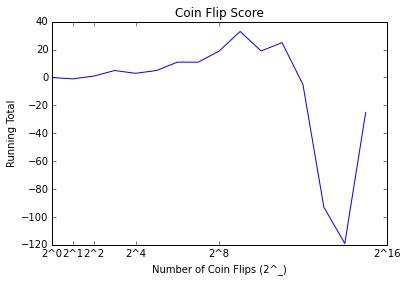

In [28]:
n = 16
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
y1 = get_results(n)
plt.plot(y1)
plt.xticks([0, 1, 2, 4, 8, 16], x1)
plt.xlabel("Number of Coin Flips (2^_)")
plt.ylabel("Running Total")
plt.title("Coin Flip Score")
plt.show()

As expected, the magnitude of the total score (heads - tails) increases with each exponential iteration. This is despite the fact that the ratio of heads to tails should approach unity with more and more coin flips.

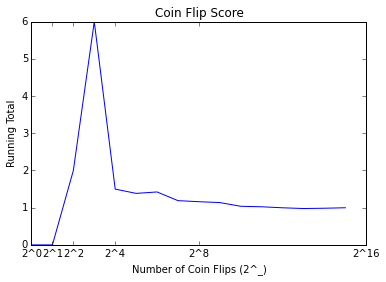

In [9]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
y1 = get_ratio(n)
plt.plot(y1)
plt.xticks([0, 1, 2, 4, 8, 16], x1)
plt.xlabel("Number of Coin Flips (2^_)")
plt.ylabel("Ratio at n Coin Flips")
plt.title("Coin Flip Score")
plt.show()

The zero values at the beginning are a legacy of my ratio formula (to avoid dividing by zero).
Those values are invalid, but with N < 10, there are no meaningful results to be found anyway.
The peak of 6 also reflects small-N variability; 7 of the first 8 flips were heads.
As expected, the ratio approaches 1 as the sample size increases.

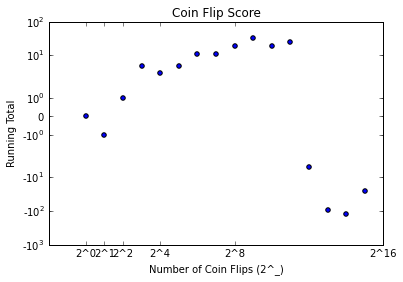

In [29]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
y1 = get_results(n)
plt.scatter(range(16), y1)
plt.yscale("symlog")
plt.xticks([0, 1, 2, 4, 8, 16], x1)
plt.xlabel("Number of Coin Flips (2^_)")
plt.ylabel("Running Total")
plt.title("Coin Flip Score")
plt.show()

Logarithmic scale makes the small sample size results easier to compare to the large sample size. The "above average" (more heads) samples are not as visually dwarfed by the later below average results.

A logarithmic (base 10) scale is not the ideal measurement for a base 2 data set, but it still makes anomalies more clear. A better measurement is still total score per total number of flips.

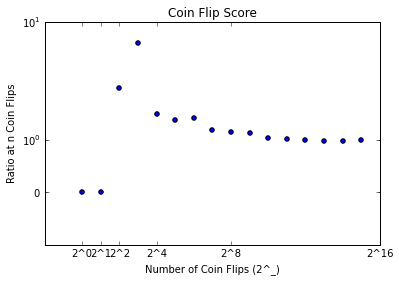

In [30]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
y1 = get_ratio(n)
plt.scatter(range(16), y1)
plt.yscale("symlog")
plt.xticks([0, 1, 2, 4, 8, 16], x1)
plt.xlabel("Number of Coin Flips (2^_)")
plt.ylabel("Ratio at n Coin Flips")
plt.title("Coin Flip Score")
plt.show()


Logarithmic scale does not make much difference for the ratio, because ratio already considers the number of iterations. The early data points (n < 2^4) still skew the data presentation.

ValueError: x and y must be the same size

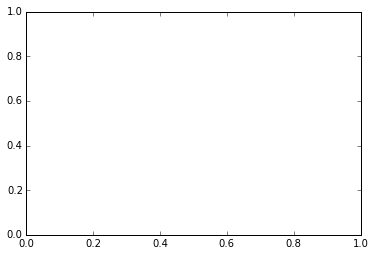

In [46]:
def twenty_rolls(n):
    i = 0
    while i < 20:
        get_mean(n)
        i += 1

x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
y1 = twenty_rolls(16)
plt.scatter(range(6), y1)
plt.yscale("symlog")
plt.xscale("symlog")
plt.xticks([0, 1, 2, 4, 8, 16], x1)
plt.xlabel("Number of Coin Flips (2^_)")
plt.ylabel("Mean at Interval")
plt.title("Coin Flip: Mean")
plt.show()